# Bank Personal Loan Modelling

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

!pip install jcopml
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value, plot_confusion_matrix, plot_classification_report, plot_pr_curve
from jcopml.feature_importance import mean_score_decrease

## Data Preparation

### Dataset Loading

In [ ]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv', index_col='ID')

df.head(50)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


### Rename Dataframe Columns

In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

### Data Cleaning

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


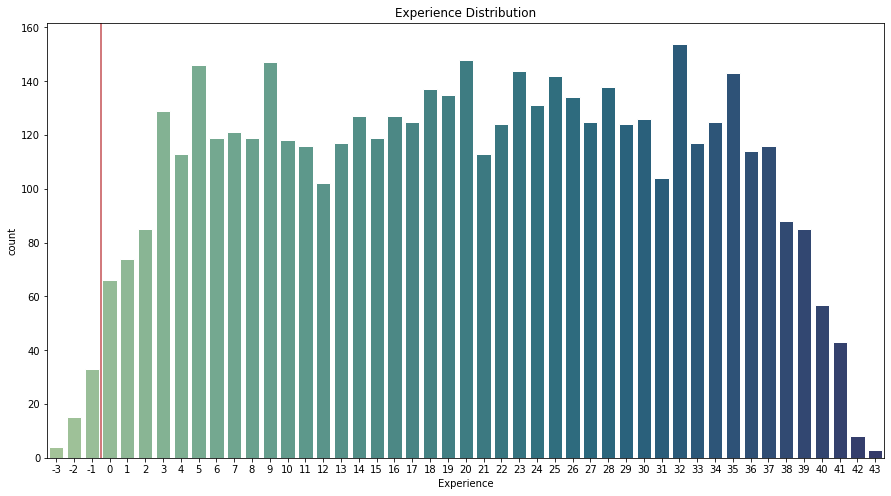

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('Experience Distribution')
plt.axvline(x = 2.5, color = 'r')
sns.set_theme()
sns.countplot(df.Experience, palette= 'crest');

In [ ]:
df.loc[df['Experience'] < 0, 'Experience'] = 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


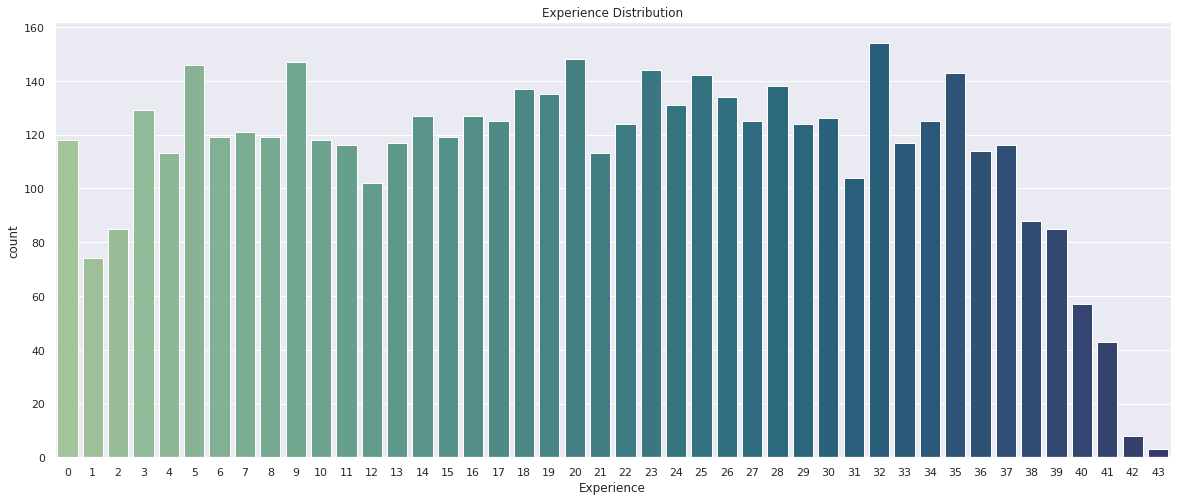

In [ ]:
plt.figure(figsize = (20, 8))
plt.title('Experience Distribution')
sns.set_theme()
sns.countplot(df.Experience, palette= 'crest');

### Missing Values Checking

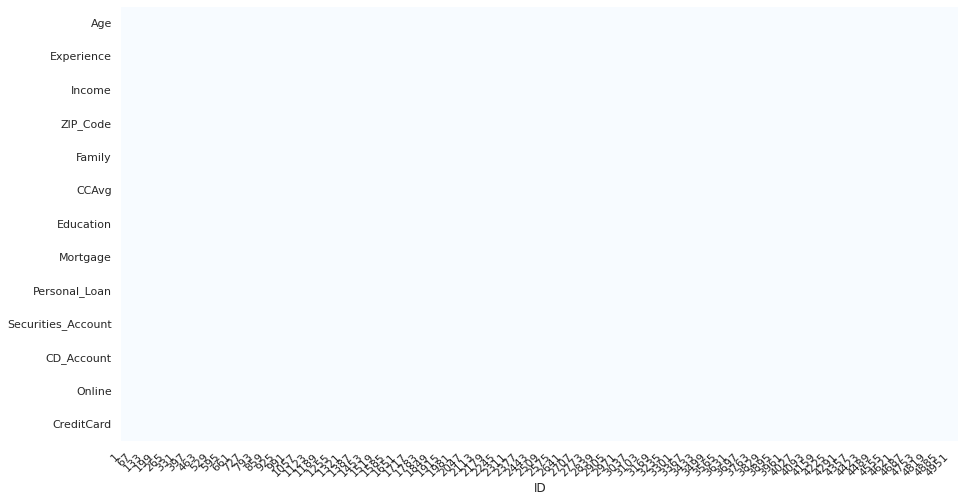

In [ ]:
plot_missing_value(df)

### Imbalance Data Checking

In [ ]:
df.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


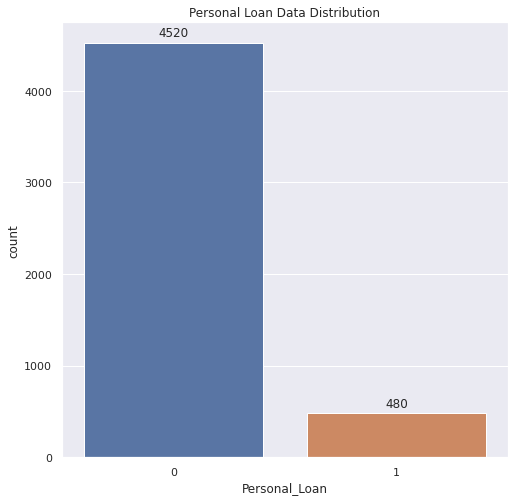

In [ ]:
plt.figure(figsize = (8, 8))
loanplot = sns.countplot(df.Personal_Loan);

for i in loanplot.patches:
    loanplot.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Personal Loan Data Distribution')

plt.show()

### Feature and Target Data Selection + Dataset Splitting

In [ ]:
X = df.drop(columns = 'Personal_Loan')
y = df.Personal_Loan

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 12), (1000, 12), (4000,), (1000,))

## AutoML

In [ ]:
from jcopml.automl import AutoClassifier

In [ ]:
X.columns

Index(['Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [ ]:
automl = AutoClassifier(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'], ['ZIP_Code', 'Education', 'Securities_Account', 'CD_Account', 'Online','CreditCard'])
automl.fit(X, y, cv = 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.1s


In [ ]:
automl.plot_results()

### LogisticRegression AutoML

In [ ]:
automl.fit(X, y, cv = 5, algo = ['logreg'], n_trial = 100)

### RandomForestClassifier AutoML

In [ ]:
automl.fit(X, y, cv = 5, algo = ['rf'], n_trial = 100)

### XGBClassifier AutoML

In [ ]:
automl.fit(X, y, cv = 5, algo = ['xgb'], n_trial = 100)

## LogisticRegression


- Usually, the logistic regression gives a good score on an imbalanced target on a dataset

- GridSearchCV are used due to the least amount of tuned parameter

- Tuned parameter:
    - C = inverse of model's regularization (penalty parameter) C <<, more tolerant to noise data/miss data, the model is getting smoother, the model is getting generalized
    
    - fit_intercept = whether adding bias to the decision function or not
    
    - class_weight = class target weighting values range of variations(0.05 - 0.45)

### Logregs 1
- No scaling + gsp.logreg_params + no class weight

- Score:
    - Validation score = 0.755
    
    - F1 score = 0.78
    
    - Accuracy = 0.96
    

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [ ]:
gsp.logreg_params

{'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__fit_intercept': [True, False]}

In [ ]:
# preprocessor
preprocessor = ColumnTransformer([
                                  ('numeric', num_pipe(), ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']),
                                  ('categoric', cat_pipe(encoder='onehot'), ['ZIP_Code', 'Education', 'Securities_Account', 'CD_Account', 'Online','CreditCard']),
])

# pipeline
pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

# tuning + training
logregs1 = GridSearchCV(pipeline, gsp.logreg_params, cv= 5, scoring = 'f1', n_jobs=-1, verbose=1)
logregs1.fit(X_train, y_train)
                      
print(logregs1.best_params_)
print(logregs1.score(X_train, y_train), logregs1.best_score_, logregs1.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s


{'algo__C': 1000.0, 'algo__fit_intercept': True}
0.7558139534883721 0.7517760370367051 0.7624309392265194


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    7.0s finished


#### Logregs 1 Result

In [ ]:
pd.DataFrame(logregs1.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__C,param_algo__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.158473,0.049011,0.007494,0.001827,100,True,"{'algo__C': 100.0, 'algo__fit_intercept': True}",0.822695,0.788732,0.746269,0.697674,0.723404,0.755755,0.044896,1
9,0.159767,0.049524,0.007794,0.001790,10,False,"{'algo__C': 10.0, 'algo__fit_intercept': False}",0.788321,0.785714,0.766917,0.671756,0.727273,0.747996,0.043929,2
8,0.182410,0.051756,0.007885,0.001729,10,True,"{'algo__C': 10.0, 'algo__fit_intercept': True}",0.802817,0.785714,0.736842,0.687023,0.723404,0.747160,0.042122,3
12,0.179333,0.044546,0.007954,0.002109,1000,True,"{'algo__C': 1000.0, 'algo__fit_intercept': True}",0.802817,0.785714,0.738462,0.697674,0.706767,0.746287,0.041800,4
11,0.158681,0.049706,0.007658,0.001837,100,False,"{'algo__C': 100.0, 'algo__fit_intercept': False}",0.788321,0.774648,0.751880,0.692308,0.723404,0.746112,0.034755,5
6,0.158026,0.048873,0.007824,0.002138,1,True,"{'algo__C': 1.0, 'algo__fit_intercept': True}",0.785714,0.785714,0.748092,0.676923,0.733813,0.746051,0.040197,6
7,0.157503,0.048924,0.007889,0.001660,1,False,"{'algo__C': 1.0, 'algo__fit_intercept': False}",0.785714,0.780142,0.732824,0.707692,0.719424,0.745159,0.031896,7
13,0.160167,0.047908,0.006898,0.001698,1000,False,"{'algo__C': 1000.0, 'algo__fit_intercept': False}",0.776978,0.780142,0.736842,0.671756,0.737589,0.740661,0.039114,8
4,0.158633,0.049233,0.007836,0.001973,0.1,True,"{'algo__C': 0.1, 'algo__fit_intercept': True}",0.746269,0.735294,0.692913,0.656000,0.723077,0.710711,0.032655,9
5,0.157628,0.048384,0.007855,0.002090,0.1,False,"{'algo__C': 0.1, 'algo__fit_intercept': False}",0.746269,0.744526,0.692913,0.655738,0.713178,0.710525,0.033919,10


#### Logregs 1 Matrix + Report

Train report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3616
           1       0.89      0.67      0.76       384

    accuracy                           0.96      4000
   macro avg       0.93      0.83      0.87      4000
weighted avg       0.96      0.96      0.96      4000


Test report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.86      0.72      0.78        96

    accuracy                           0.96      1000
   macro avg       0.92      0.85      0.88      1000
weighted avg       0.96      0.96      0.96      1000



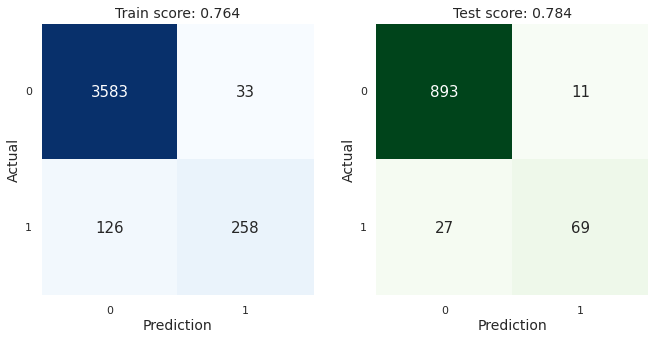

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, logregs1)
plot_classification_report(X_train, y_train, X_test, y_test, logregs1, report=True)

### Logregs 2
- Manual parameter + class weight + scaling (standard)

- Score-1:
    - Validation score = 0.74
    
    - F1 score = 0.75
    
    - Accuracy = 0.95
    

- Score-2: --> Final
    - Validation score = 0.74
    
    - F1 score = 0.78
    
    - Accuracy = 0.96
    

In [ ]:
# class weight
parameter = {
    'algo__C': np.arange(1.0, 1.5, 0.1),
    'algo__fit_intercept': [True, False],
    'algo__class_weight': [{0: x , 1: 1-x} for x in [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]]
}

In [ ]:
# preprocessor
preprocessor = ColumnTransformer([
                                  ('numeric', num_pipe(scaling= 'standard'), ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']),
                                  ('categoric', cat_pipe(encoder='onehot'), ['ZIP_Code', 'Education', 'Securities_Account', 'CD_Account', 'Online','CreditCard']),
])

# pipeline
pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42, ))
])

# tuning + training
logregs2 = GridSearchCV(pipeline, parameter, cv= 5, scoring = 'f1', n_jobs=-1, verbose=1)
logregs2.fit(X_train, y_train)
                      
print(logregs2.best_params_)
print(logregs2.score(X_train, y_train), logregs2.best_score_, logregs2.score(X_test, y_test))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   25.4s


{'algo__C': 1.3000000000000003, 'algo__class_weight': {0: 0.35, 1: 0.65}, 'algo__fit_intercept': False}
0.7973154362416107 0.7479931319688292 0.7830687830687831


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   29.5s finished


#### Logregs 2 Result

In [ ]:
pd.DataFrame(logregs2.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__C,param_algo__class_weight,param_algo__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
67,0.116171,0.003624,0.007073,0.001653,1.3,"{0: 0.35, 1: 0.65}",False,"{'algo__C': 1.3000000000000003, 'algo__class_w...",0.794702,0.751678,0.736111,0.705882,0.761290,0.749933,0.029216,1
85,0.117176,0.003514,0.008509,0.001238,1.4,"{0: 0.35, 1: 0.65}",False,"{'algo__C': 1.4000000000000004, 'algo__class_w...",0.794702,0.746667,0.736111,0.705882,0.756410,0.747954,0.028875,2
66,0.116760,0.002788,0.008553,0.000892,1.3,"{0: 0.35, 1: 0.65}",True,"{'algo__C': 1.3000000000000003, 'algo__class_w...",0.794702,0.751678,0.726027,0.705882,0.761290,0.747916,0.030423,3
48,0.121877,0.002558,0.009122,0.000360,1.2,"{0: 0.35, 1: 0.65}",True,"{'algo__C': 1.2000000000000002, 'algo__class_w...",0.794702,0.751678,0.726027,0.705882,0.753247,0.746307,0.029881,4
49,0.116413,0.003829,0.008900,0.001968,1.2,"{0: 0.35, 1: 0.65}",False,"{'algo__C': 1.2000000000000002, 'algo__class_w...",0.789474,0.751678,0.731034,0.705882,0.753247,0.746263,0.027596,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,0.114875,0.001765,0.006747,0.001521,1.2,"{0: 0.05, 1: 0.95}",False,"{'algo__C': 1.2000000000000002, 'algo__class_w...",0.571429,0.578313,0.549618,0.572650,0.575875,0.569577,0.010269,86
18,0.115412,0.003838,0.007829,0.003275,1.1,"{0: 0.05, 1: 0.95}",True,"{'algo__C': 1.1, 'algo__class_weight': {0: 0.0...",0.571429,0.573705,0.549618,0.570213,0.581395,0.569272,0.010568,87
0,0.123222,0.004386,0.007449,0.002239,1,"{0: 0.05, 1: 0.95}",True,"{'algo__C': 1.0, 'algo__class_weight': {0: 0.0...",0.567050,0.571429,0.547529,0.575107,0.581395,0.568502,0.011493,88
1,0.116180,0.003159,0.009602,0.004297,1,"{0: 0.05, 1: 0.95}",False,"{'algo__C': 1.0, 'algo__class_weight': {0: 0.0...",0.567050,0.569170,0.545455,0.570213,0.579151,0.566208,0.011169,89


#### Logregs 2 Matrix + Report

Train report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3616
           1       0.82      0.77      0.80       384

    accuracy                           0.96      4000
   macro avg       0.90      0.88      0.89      4000
weighted avg       0.96      0.96      0.96      4000


Test report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       904
           1       0.80      0.77      0.78        96

    accuracy                           0.96      1000
   macro avg       0.89      0.87      0.88      1000
weighted avg       0.96      0.96      0.96      1000



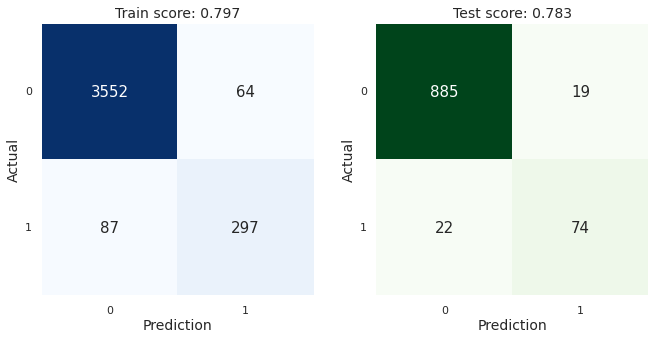

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, logregs2)
plot_classification_report(X_train, y_train, X_test, y_test, logregs2, report=True)

#### Logregs 2 PR_AUC

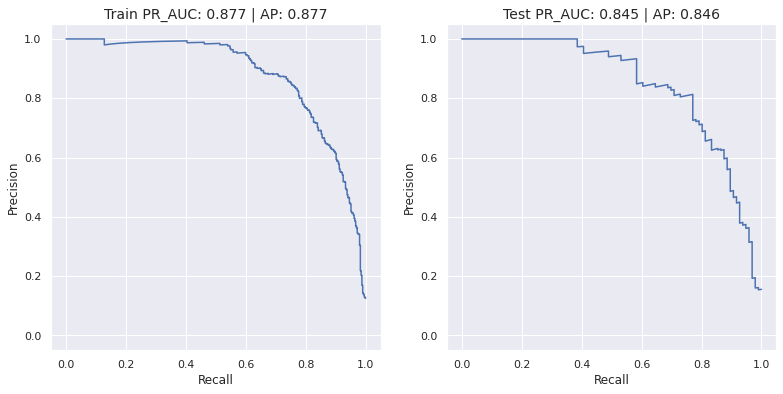

In [ ]:
plot_pr_curve(X_train, y_train, X_test, y_test, logregs2)

## RandomForestClassifier

- The use of RandomForestClassifier due to its characteristics (prone overfit algorithm, low bias, high variance) so it will fit for handling a dataset that having a large number of data points and relatively small amount of features 

- Not necessary to be scaled (tree-based algorithm)

- Tuned parameter:
    - max_depth = decision tree depth, max_depth >>, the model is getting complex (high variance), prone to overfit
    
    - max_features = maximum features that will be tested, max_features >>, tested features >>, prone to get best decision, prone to overfit
    
    - min_sample_leaf = jumlah minimum leaf (data tiap percabangan), min sample leaf >>, prevent splitting, model semakin simple (low variance), decrease overfit
    
    - n_estimators = number of decision tree, n_estimators >>, more averaging, the model is getting simple (low variance), decrease overfit
    
    - class_weight =  class target weighting values range of variations (0.05 - 0.45)

### RF 1
- rsp.rf_params + no weighting

- Score:
    - Validation score = 0.90
    
    - F1 score = 0.95
    
    - Accuracy = 0.99

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rsp.rf_params

{'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20),
 'algo__n_estimators': Integer(low=100, high=200)}

In [ ]:
# preprocessor
preprocessor = ColumnTransformer([
                                  ('numeric', num_pipe(), ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']),
                                  ('categoric', cat_pipe(encoder='onehot'), ['ZIP_Code', 'Education', 'Securities_Account', 'CD_Account', 'Online','CreditCard']),
])

# pipeline
pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# tuning + training
rf1 = RandomizedSearchCV(pipeline, rsp.rf_params, cv=5, scoring='f1', n_jobs=-1, 
                         verbose=1, random_state=42)
rf1.fit(X_train, y_train)
                        
print(rf1.best_params_)
print(rf1.score(X_train, y_train), rf1.best_score_, rf1.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'algo__max_depth': 71, 'algo__max_features': 0.6331731119758383, 'algo__min_samples_leaf': 3, 'algo__n_estimators': 200}
0.9747675962815404 0.9096313251710905 0.9533678756476685


#### RF 1 Result

In [ ]:
pd.DataFrame(rf1.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__max_depth,param_algo__max_features,param_algo__min_samples_leaf,param_algo__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.484151,0.076345,0.114124,0.003779,71,0.633173,3,200,"{'algo__max_depth': 71, 'algo__max_features': ...",0.927152,0.938776,0.879433,0.888889,0.913907,0.909631,0.022436,1
2,0.843383,0.046238,0.118741,0.002408,30,0.513324,4,123,"{'algo__max_depth': 30, 'algo__max_features': ...",0.927152,0.924138,0.867133,0.890411,0.900662,0.901899,0.022246,2
8,1.062776,0.050821,0.112383,0.008103,66,0.656547,12,154,"{'algo__max_depth': 66, 'algo__max_features': ...",0.921053,0.937931,0.851064,0.882759,0.900662,0.898694,0.030219,3
4,1.395565,0.049790,0.117474,0.001653,63,0.944697,2,163,"{'algo__max_depth': 63, 'algo__max_features': ...",0.928105,0.931507,0.873239,0.861111,0.899329,0.898658,0.028293,4
1,1.150751,0.054422,0.114892,0.003060,80,0.637165,19,186,"{'algo__max_depth': 80, 'algo__max_features': ...",0.927152,0.930556,0.859155,0.870748,0.899329,0.897388,0.028849,5
0,1.209401,0.053238,0.109017,0.002119,58,0.816889,15,171,"{'algo__max_depth': 58, 'algo__max_features': ...",0.927152,0.930556,0.845070,0.872483,0.907895,0.896631,0.033018,6
7,0.730498,0.038707,0.107953,0.000646,78,0.459875,16,114,"{'algo__max_depth': 78, 'algo__max_features': ...",0.933333,0.924138,0.848921,0.888889,0.885906,0.896237,0.030180,7
3,1.109574,0.047996,0.118692,0.003124,22,0.118526,2,187,"{'algo__max_depth': 22, 'algo__max_features': ...",0.909091,0.892086,0.852941,0.852941,0.902778,0.881967,0.024315,8
5,0.906504,0.035606,0.112384,0.004210,79,0.265064,12,157,"{'algo__max_depth': 79, 'algo__max_features': ...",0.916667,0.885714,0.838235,0.846715,0.896552,0.876777,0.029837,9
6,0.688232,0.038549,0.112597,0.004818,41,0.10636,17,190,"{'algo__max_depth': 41, 'algo__max_features': ...",0.311111,0.250000,0.288889,0.209302,0.307692,0.273399,0.038715,10


#### RF1 Matrix + Report

Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       0.99      0.96      0.97       384

    accuracy                           1.00      4000
   macro avg       0.99      0.98      0.99      4000
weighted avg       1.00      1.00      1.00      4000


Test report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       904
           1       0.95      0.96      0.95        96

    accuracy                           0.99      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.99      0.99      0.99      1000



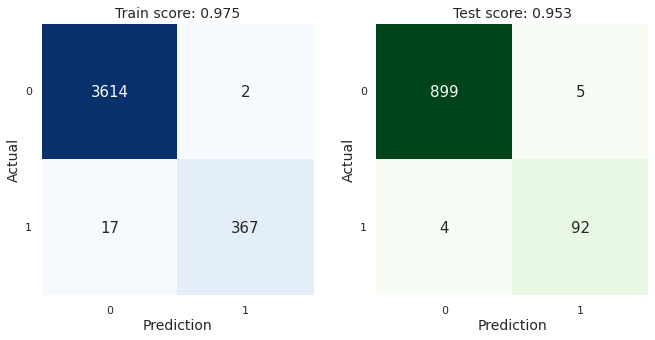

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, rf1)
plot_classification_report(X_train, y_train, X_test, y_test, rf1, report=True)

### RF 2
- rsp.rf_params + class weight = 'balanced'

- Score:
    - Validation score = 0.90
    
    - F1 score = 0.92
    
    - Accuracy = 0.98

In [ ]:
# preprocessor
preprocessor = ColumnTransformer([
                                  ('numeric', num_pipe(), ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']),
                                  ('categoric', cat_pipe(encoder='onehot'), ['ZIP_Code', 'Education', 'Securities_Account', 'CD_Account', 'Online','CreditCard']),
])

# pipeline
pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', RandomForestClassifier(n_jobs=-1, random_state=42, class_weight= 'balanced'))
])

# tuning + training
rf2 = RandomizedSearchCV(pipeline, rsp.rf_params, cv=5, scoring='f1', n_jobs=-1, 
                         verbose=1, random_state=42)
rf2.fit(X_train, y_train)
                        
print(rf2.best_params_)
print(rf2.score(X_train, y_train), rf2.best_score_, rf2.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.9s finished


{'algo__max_depth': 30, 'algo__max_features': 0.5133240027692805, 'algo__min_samples_leaf': 4, 'algo__n_estimators': 123}
0.9576059850374066 0.9029185211495537 0.9215686274509804


#### RF 2 Result

In [ ]:
pd.DataFrame(rf2.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__max_depth,param_algo__max_features,param_algo__min_samples_leaf,param_algo__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.851723,0.051664,0.116557,0.004407,30,0.513324,4,123,"{'algo__max_depth': 30, 'algo__max_features': ...",0.911392,0.948718,0.897436,0.880503,0.876543,0.902919,0.026067,1
9,1.489951,0.072406,0.116948,0.004983,71,0.633173,3,200,"{'algo__max_depth': 71, 'algo__max_features': ...",0.910256,0.947368,0.893333,0.881579,0.880503,0.902608,0.024815,2
4,1.421048,0.071311,0.113118,0.004646,63,0.944697,2,163,"{'algo__max_depth': 63, 'algo__max_features': ...",0.928105,0.932432,0.851064,0.880000,0.896104,0.897541,0.030402,3
3,1.164348,0.016904,0.114571,0.004235,22,0.118526,2,187,"{'algo__max_depth': 22, 'algo__max_features': ...",0.893082,0.901235,0.878981,0.886076,0.871166,0.886108,0.010503,4
8,1.007941,0.021218,0.115846,0.003640,66,0.656547,12,154,"{'algo__max_depth': 66, 'algo__max_features': ...",0.863905,0.913580,0.882353,0.843373,0.835294,0.867701,0.028199,5
5,0.984680,0.051224,0.108343,0.000641,79,0.265064,12,157,"{'algo__max_depth': 79, 'algo__max_features': ...",0.865497,0.887574,0.873563,0.813953,0.862069,0.860531,0.024890,6
7,0.690632,0.017238,0.112640,0.003508,78,0.459875,16,114,"{'algo__max_depth': 78, 'algo__max_features': ...",0.862069,0.862069,0.885057,0.830409,0.862069,0.860335,0.017411,7
0,1.183419,0.104103,0.110298,0.002043,58,0.816889,15,171,"{'algo__max_depth': 58, 'algo__max_features': ...",0.844444,0.891566,0.868571,0.850299,0.839080,0.858792,0.019164,8
1,1.138929,0.020327,0.114549,0.003866,80,0.637165,19,186,"{'algo__max_depth': 80, 'algo__max_features': ...",0.858757,0.886228,0.863636,0.825581,0.824859,0.851812,0.023609,9
6,0.726437,0.022498,0.110846,0.003420,41,0.10636,17,190,"{'algo__max_depth': 41, 'algo__max_features': ...",0.699507,0.793478,0.824859,0.718750,0.737374,0.754794,0.047042,10


#### RF 2 Matrix + Report

Train report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3616
           1       0.92      1.00      0.96       384

    accuracy                           0.99      4000
   macro avg       0.96      1.00      0.98      4000
weighted avg       0.99      0.99      0.99      4000


Test report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       904
           1       0.87      0.98      0.92        96

    accuracy                           0.98      1000
   macro avg       0.93      0.98      0.96      1000
weighted avg       0.99      0.98      0.98      1000



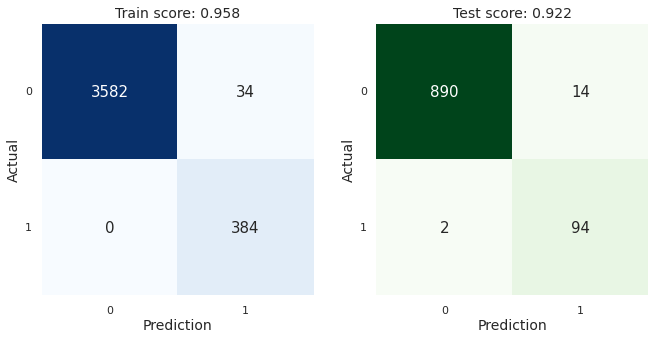

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, rf2)
plot_classification_report(X_train, y_train, X_test, y_test, rf2, report=True)

### RF 3
- Manual parameter

- Score: --> Final
    - Validation score = 0.90
    
    - F1 score = 0.94
    
    - Accuracy = 0.99

In [ ]:
# class weight
rf_params = {
    'algo__max_depth': np.arange(20, 80, 10),
    'algo__max_features': np.arange(0.1, 1.1, 0.1),
    'algo__min_samples_leaf': np.arange(1, 21),
    'algo__n_estimators': np.arange(100, 200),
    'algo__class_weight': [{0: x , 1: 1-x} for x in [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]]
}

In [ ]:
# preprocessor
preprocessor = ColumnTransformer([
                                  ('numeric', num_pipe(), ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']),
                                  ('categoric', cat_pipe(encoder='onehot'), ['ZIP_Code', 'Education', 'Securities_Account', 'CD_Account', 'Online','CreditCard']),
])

# pipeline
pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# tuning + training
rf3 = RandomizedSearchCV(pipeline, rf_params, cv=5, scoring='f1', n_jobs=-1, 
                         verbose=1, random_state=42)
rf3.fit(X_train, y_train)
                        
print(rf3.best_params_)
print(rf3.score(X_train, y_train), rf3.best_score_, rf3.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.6s finished


{'algo__n_estimators': 180, 'algo__min_samples_leaf': 2, 'algo__max_features': 0.7000000000000001, 'algo__max_depth': 20, 'algo__class_weight': {0: 0.35, 1: 0.65}}
0.9947780678851176 0.9050706679029925 0.9435897435897437


#### RF 3 Result

In [ ]:
pd.DataFrame(rf3.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_estimators,param_algo__min_samples_leaf,param_algo__max_features,param_algo__max_depth,param_algo__class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,1.397193,0.056875,0.111723,0.003189,180,2,0.7,20,"{0: 0.35, 1: 0.65}","{'algo__n_estimators': 180, 'algo__min_samples...",0.928105,0.938776,0.879433,0.878378,0.900662,0.905071,0.024722,1
4,1.226602,0.045123,0.116053,0.005159,168,3,0.6,70,"{0: 0.05, 1: 0.95}","{'algo__n_estimators': 168, 'algo__min_samples...",0.910256,0.941176,0.901961,0.884615,0.881988,0.903999,0.021381,2
8,1.076339,0.059710,0.114985,0.003404,156,8,0.7,50,"{0: 0.4, 1: 0.6}","{'algo__n_estimators': 156, 'algo__min_samples...",0.915033,0.931507,0.876712,0.864865,0.901961,0.898016,0.024412,3
7,1.244456,0.005437,0.113938,0.006082,190,19,1,30,"{0: 0.45, 1: 0.55}","{'algo__n_estimators': 190, 'algo__min_samples...",0.916129,0.938776,0.853147,0.859060,0.896104,0.892643,0.032801,4
1,0.991688,0.050986,0.114131,0.002877,155,12,0.6,50,"{0: 0.3, 1: 0.7}","{'algo__n_estimators': 155, 'algo__min_samples...",0.909091,0.926174,0.876712,0.874172,0.869565,0.891143,0.022411,5
9,0.728574,0.036512,0.107257,0.000188,103,13,0.8,40,"{0: 0.1, 1: 0.9}","{'algo__n_estimators': 103, 'algo__min_samples...",0.855491,0.920245,0.855491,0.850299,0.842105,0.864727,0.028188,6
3,1.258865,0.044769,0.118239,0.004895,178,12,1,20,"{0: 0.15, 1: 0.85}","{'algo__n_estimators': 178, 'algo__min_samples...",0.858824,0.918239,0.857143,0.829268,0.831325,0.858960,0.032133,7
6,0.902218,0.045673,0.119769,0.004752,137,14,0.9,20,"{0: 0.1, 1: 0.9}","{'algo__n_estimators': 137, 'algo__min_samples...",0.847458,0.891566,0.855491,0.833333,0.848837,0.855337,0.019499,8
2,0.769846,0.030215,0.112164,0.002765,132,20,0.6,20,"{0: 0.1, 1: 0.9}","{'algo__n_estimators': 132, 'algo__min_samples...",0.853933,0.896970,0.875000,0.830409,0.820225,0.855307,0.028200,9
0,0.624937,0.009126,0.111084,0.003495,158,20,0.1,20,"{0: 0.1, 1: 0.9}","{'algo__n_estimators': 158, 'algo__min_samples...",0.663507,0.836158,0.845714,0.766667,0.789189,0.780247,0.065276,10


#### RF 3 Matrix + Report

Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      0.99      0.99       384

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Test report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.93      0.96      0.94        96

    accuracy                           0.99      1000
   macro avg       0.96      0.98      0.97      1000
weighted avg       0.99      0.99      0.99      1000



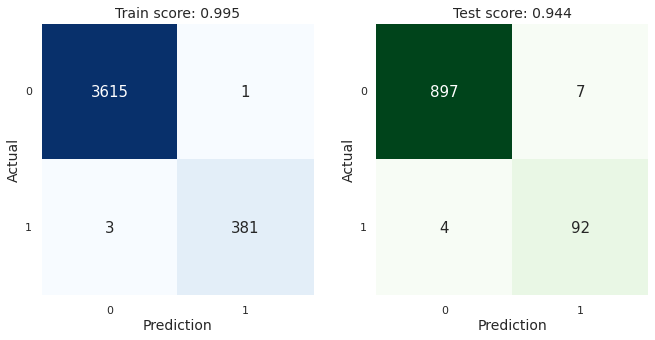

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, rf3)
plot_classification_report(X_train, y_train, X_test, y_test, rf3, report=True)

#### RF 3 PR_AUC

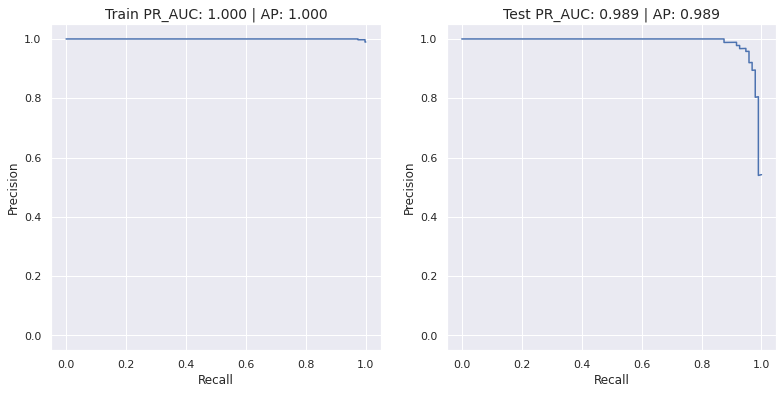

In [ ]:
plot_pr_curve(X_train, y_train, X_test, y_test, rf3)

## XGBClassifier


- The use of RandomForestClassifier due to its characteristics (prone overfit algorithm, low bias, high variance, tree-based) so it will fit for handling a dataset that having a large number of data points and relatively small amount of features

- Not necessary to be scaled (tree-based algorithm)

- Tuned parameter:
    - colsample_bytree = column subsample ratio from each tree that generated, colsample_byetree >>, prone to get best decision, prone to overfit (?)
    
    - gamma = detailness, gamma >>, semakin detail, prone to overfit
    
    - learning_rate =  number of iterations that needed to check the least error values, learning_rate >>, prone to get best decision, prone to overfit (?)
    
    - reg_alpha =  L1 regularizaion weighting, reg_alpha >>, the model is getting conservative, prone to underfit (?)
    
    - reg_lambda = L2 regularization weighting, reg_lambda >>, the model is getting conservative, prone to underfit (?)
    
    - subsample = training data subsample ratio, subsample >>, the model will getting more training data samples, prone to get best decision, prone to overfit (?)
    
    - scale_pos_weight = target data class weighting based on sum negative values/sum positive values

### XGB 1
- Using scale_pos_weight = sum(negative)/sum(positive) --> 9.416

- Score: --> Final
    - Validation score: 0.90
    
    - F1 score: 0.92
    
    - Accuracy: 0.98

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [ ]:
rsp.xgb_params

{'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__max_depth': Integer(low=1, high=10),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform')}

In [ ]:
# preprocessor
preprocessor = ColumnTransformer([
                                  ('numeric', num_pipe(), ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']),
                                  ('categoric', cat_pipe(encoder='onehot'), ['ZIP_Code', 'Education', 'Securities_Account', 'CD_Account', 'Online','CreditCard']),
])

# pipeline
pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', XGBClassifier(n_jobs=-1, random_state=42, scale_pos_weight= 9.416))
])

# tuning + training
xgb1 = RandomizedSearchCV(pipeline, rsp.xgb_params, cv= 3, n_iter= 50, n_jobs=-1, scoring = 'f1', 
                         verbose=1, random_state=42)
xgb1.fit(X_train, y_train)
                        
print(xgb1.best_params_)
print(xgb1.score(X_train, y_train), xgb1.best_score_, xgb1.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   35.1s finished


{'algo__colsample_bytree': 0.5659762154747322, 'algo__gamma': 8, 'algo__learning_rate': 0.018838307787619742, 'algo__max_depth': 9, 'algo__n_estimators': 188, 'algo__reg_alpha': 0.006859405588762045, 'algo__reg_lambda': 0.1464845749791103, 'algo__subsample': 0.6478921996725411}
0.9636135508155584 0.9018118835561534 0.9207920792079208


#### XGB 1 Result

In [ ]:
pd.DataFrame(xgb1.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__colsample_bytree,param_algo__gamma,param_algo__learning_rate,param_algo__max_depth,param_algo__n_estimators,param_algo__reg_alpha,param_algo__reg_lambda,param_algo__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,0.988547,0.015536,0.030678,0.000818,0.565976,8,0.0188383,9,188,0.00685941,0.146485,0.647892,"{'algo__colsample_bytree': 0.5659762154747322,...",0.938931,0.892430,0.874074,0.901812,0.027296,1
30,0.455389,0.002603,0.026378,0.000089,0.691852,1,0.121641,3,185,0.011503,0.00946147,0.786505,"{'algo__colsample_bytree': 0.6918516030703091,...",0.924242,0.889796,0.886364,0.900134,0.017105,2
20,0.628042,0.002440,0.022029,0.000219,0.917439,3,0.229832,5,143,0.0618205,0.162769,0.596348,"{'algo__colsample_bytree': 0.9174392973699884,...",0.934866,0.885246,0.879377,0.899830,0.024890,3
47,0.405180,0.014717,0.025939,0.000065,0.526125,1,0.084986,5,122,0.00155681,6.26012,0.74334,"{'algo__colsample_bytree': 0.5261245937025092,...",0.924812,0.900398,0.874074,0.899762,0.020719,4
22,0.836744,0.002736,0.027170,0.000658,0.834789,1,0.0200187,6,179,0.0014558,0.230979,0.638782,"{'algo__colsample_bytree': 0.8347886858974456,...",0.935361,0.885246,0.876923,0.899177,0.025811,5
45,0.705794,0.011722,0.027005,0.001054,0.650549,7,0.0124575,10,115,0.00431108,0.00302453,0.47094,"{'algo__colsample_bytree': 0.6505486716109171,...",0.934363,0.882353,0.879377,0.898698,0.025248,6
17,0.612595,0.012839,0.022139,0.000048,0.47567,5,0.24259,10,143,0.00947332,0.00471155,0.409382,"{'algo__colsample_bytree': 0.4756699028339012,...",0.908397,0.898785,0.888031,0.898404,0.008319,7
12,0.484340,0.006385,0.024548,0.002262,0.74192,1,0.277625,7,113,0.0944457,0.123291,0.513771,"{'algo__colsample_bytree': 0.7419203085006956,...",0.927757,0.891667,0.873016,0.897480,0.022723,8
3,0.635458,0.008275,0.026687,0.001375,0.97638,3,0.0582001,4,163,0.0736295,2.75272,0.640154,"{'algo__colsample_bytree': 0.9763799669573133,...",0.917910,0.902724,0.870849,0.897161,0.019611,9
37,0.668743,0.006995,0.023968,0.000634,0.828425,3,0.0325397,8,112,0.0021202,0.00104891,0.613947,"{'algo__colsample_bytree': 0.8284250399306623,...",0.938462,0.877637,0.871595,0.895898,0.030198,10


#### XGB 1 Matrix + Report

Train report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3616
           1       0.93      1.00      0.96       384

    accuracy                           0.99      4000
   macro avg       0.96      1.00      0.98      4000
weighted avg       0.99      0.99      0.99      4000


Test report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.88      0.97      0.92        96

    accuracy                           0.98      1000
   macro avg       0.94      0.98      0.96      1000
weighted avg       0.99      0.98      0.98      1000



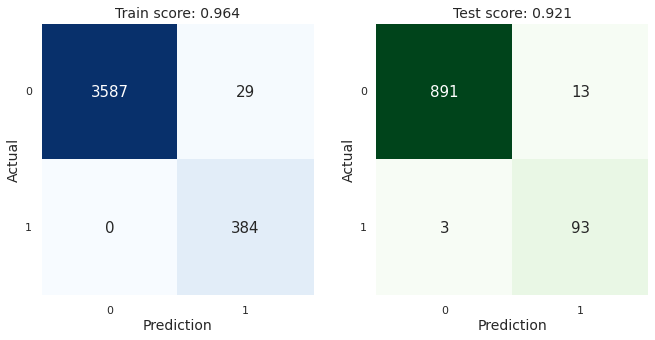

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, xgb1)
plot_classification_report(X_train, y_train, X_test, y_test, xgb1, report=True)

#### XGB 1 PR_AUC

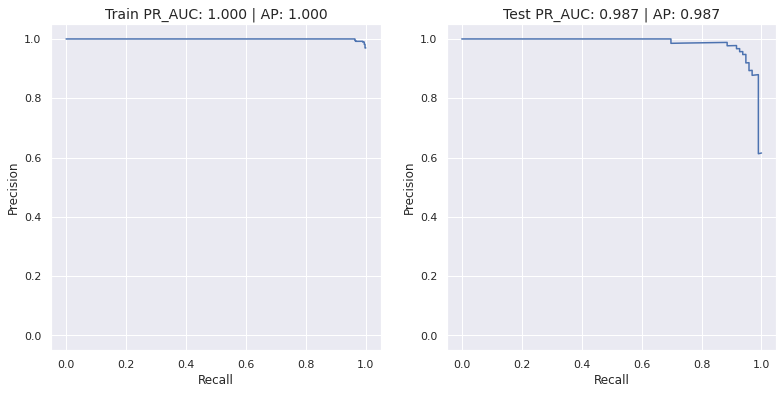

In [ ]:
plot_pr_curve(X_train, y_train, X_test, y_test, xgb1)

### XGB 2
- Manual parameter + scale_pos_weight

- Score-1:
    - Validation score: 0.819
    
    - F1 score: 0.816
    
    - Accuracy: 0.93

- Score-2:
    - Validation score: 0.84
    
    - F1 score: 0.83
    
    - Accuracy: 0.96

In [ ]:
xgb_param = {
    'algo__colsample_bytree': np.arange(0.1, 1),
    'algo__gamma': np.arange(1, 10),
    'algo__learning_rate': np.arange(0.2, 0.5, 0.01),
    'algo__max_depth': np.arange(1, 10),
    'algo__n_estimators': np.arange(100, 200),
    'algo__reg_alpha': np.arange(-3.0, 1.0, 0.1),
    'algo__reg_lambda': np.logspace(-3, 3, 7),
    'algo__subsample': np.arange(0.3, 0.8, 0.1),
    'algo__scale_pos_weight': np.arange(9.0, 9.9, 0.1)
    }

In [ ]:
# preprocessor
preprocessor = ColumnTransformer([
                                  ('numeric', num_pipe(), ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']),
                                  ('categoric', cat_pipe(encoder='onehot'), ['ZIP_Code', 'Education', 'Securities_Account', 'CD_Account', 'Online','CreditCard']),
])

# pipeline
pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

# tuning + training
xgb2 = RandomizedSearchCV(pipeline, xgb_param, cv= 3, n_iter= 50, n_jobs=-1, scoring = 'f1', 
                         verbose=1, random_state=42)
xgb2.fit(X_train, y_train)
                        
print(xgb2.best_params_)
print(xgb2.score(X_train, y_train), xgb2.best_score_, xgb2.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.7s finished


{'algo__subsample': 0.7000000000000002, 'algo__scale_pos_weight': 9.2, 'algo__reg_lambda': 0.001, 'algo__reg_alpha': 0.30000000000000293, 'algo__n_estimators': 167, 'algo__max_depth': 4, 'algo__learning_rate': 0.22000000000000003, 'algo__gamma': 1, 'algo__colsample_bytree': 0.1}
0.9365853658536586 0.8488108399515742 0.8317757009345795


#### XGB 2 Result

In [ ]:
pd.DataFrame(xgb2.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__subsample,param_algo__scale_pos_weight,param_algo__reg_lambda,param_algo__reg_alpha,param_algo__n_estimators,param_algo__max_depth,param_algo__learning_rate,param_algo__gamma,param_algo__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
28,0.245958,0.006871,0.029148,0.004797,0.7,9.2,0.001,0.3,167,4,0.22,1,0.1,"{'algo__subsample': 0.7000000000000002, 'algo_...",0.845588,0.840467,0.860377,0.848811,0.008442,1
11,0.289638,0.007585,0.025724,0.004556,0.7,9,0.001,0.7,189,5,0.26,6,0.1,"{'algo__subsample': 0.7000000000000002, 'algo_...",0.853147,0.845588,0.842491,0.847075,0.004476,2
22,0.353225,0.004785,0.027074,0.001126,0.5,9.7,0.001,0.5,180,9,0.21,3,0.1,"{'algo__subsample': 0.5, 'algo__scale_pos_weig...",0.842491,0.796875,0.866920,0.835429,0.029029,3
45,0.209578,0.009969,0.021461,0.000179,0.7,9.7,0.01,0.9,132,4,0.3,5,0.1,"{'algo__subsample': 0.7000000000000002, 'algo_...",0.766773,0.847584,0.834532,0.816296,0.035421,4
21,0.195374,0.004906,0.027018,0.005872,0.7,9.3,1,0.6,138,3,0.2,1,0.1,"{'algo__subsample': 0.7000000000000002, 'algo_...",0.763754,0.823105,0.826855,0.804571,0.028903,5
16,0.305359,0.007966,0.021934,0.000717,0.4,9.1,10,2.66454e-15,181,8,0.31,8,0.1,"{'algo__subsample': 0.4, 'algo__scale_pos_weig...",0.782334,0.784983,0.808219,0.791845,0.011628,6
42,0.269894,0.011666,0.024193,0.002640,0.3,9.4,0.1,0.7,178,6,0.47,9,0.1,"{'algo__subsample': 0.3, 'algo__scale_pos_weig...",0.793443,0.804348,0.763889,0.787226,0.017092,7
6,0.196957,0.017253,0.021771,0.000271,0.3,9,0.001,0.7,163,2,0.43,2,0.1,"{'algo__subsample': 0.3, 'algo__scale_pos_weig...",0.748387,0.785965,0.812950,0.782434,0.026476,8
17,0.134872,0.002874,0.018527,0.000249,0.7,9.9,0.01,0.9,114,1,0.27,1,0.1,"{'algo__subsample': 0.7000000000000002, 'algo_...",0.654054,0.676829,0.686047,0.672310,0.013446,9
47,0.186978,0.045026,0.016351,0.003826,0.3,9.3,100,0.7,142,9,0.41,7,0.1,"{'algo__subsample': 0.3, 'algo__scale_pos_weig...",0.632391,0.627968,0.626703,0.629021,0.002438,10


#### XGB 2 Matrix + Report

Train report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3616
           1       0.88      1.00      0.94       384

    accuracy                           0.99      4000
   macro avg       0.94      0.99      0.96      4000
weighted avg       0.99      0.99      0.99      4000


Test report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       904
           1       0.75      0.93      0.83        96

    accuracy                           0.96      1000
   macro avg       0.87      0.95      0.91      1000
weighted avg       0.97      0.96      0.97      1000



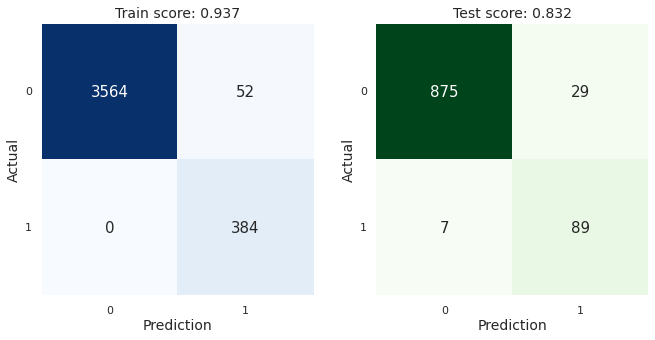

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, xgb2)
plot_classification_report(X_train, y_train, X_test, y_test, xgb2, report=True)

## Feature Importance

### Logregs

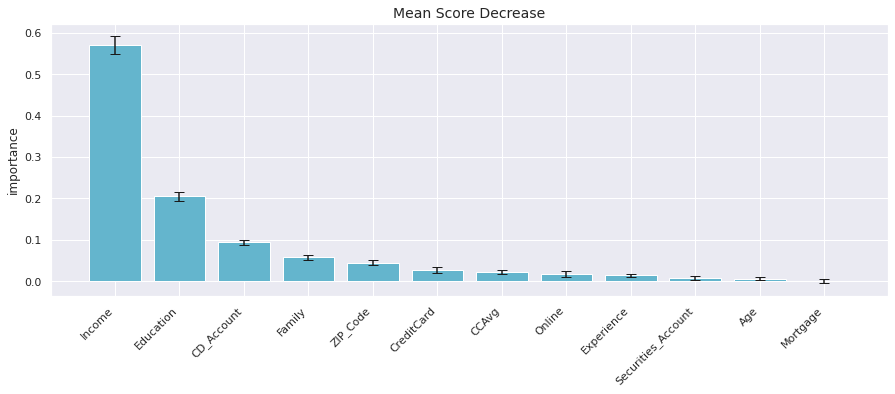

In [ ]:
df_logreg_imp = mean_score_decrease(X_train, y_train, logregs2, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)

### RF

In [ ]:
from jcopml.feature_importance import mean_loss_decrease

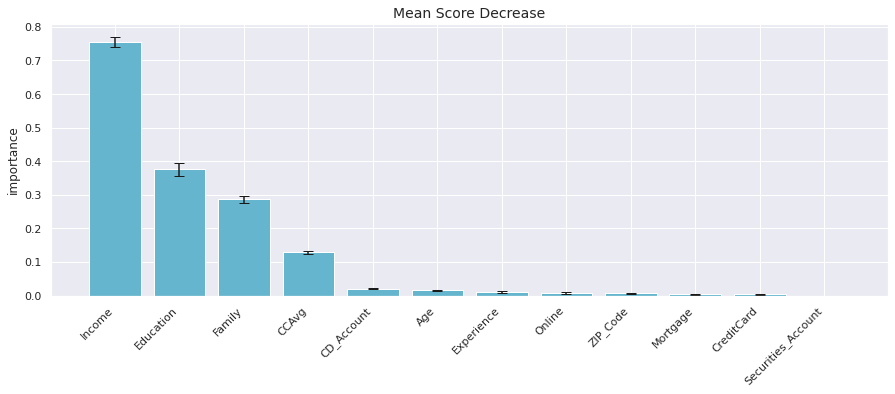

In [ ]:
df_RF_imp1 = mean_score_decrease(X_train, y_train, rf3, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)

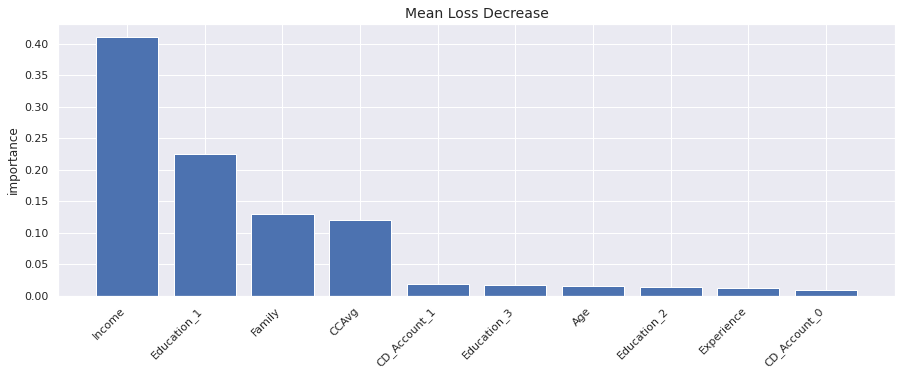

In [ ]:
df_RF_imp2 = mean_loss_decrease(X_train, rf3, plot=True, topk=10)

### XGB

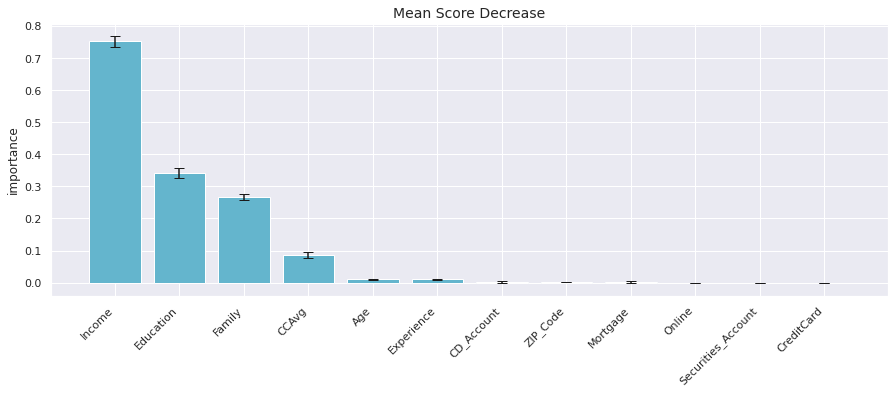

In [ ]:
df_xgb_imp = mean_score_decrease(X_train, y_train, xgb1, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)

## Extensive EDA

### Education vs Personal Loan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


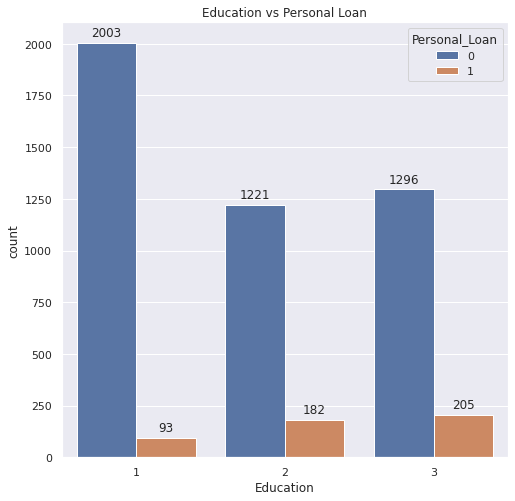

In [ ]:
plt.figure(figsize = (8,8))
plt.title('Education vs Personal Loan')
ed_plot = sns.countplot(df.Education, hue = df.Personal_Loan);

for i in ed_plot.patches:
    ed_plot.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Family vs Personal Loan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


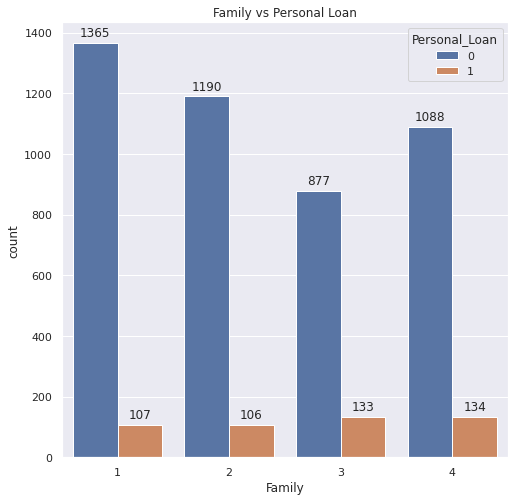

In [ ]:
plt.figure(figsize = (8,8))
plt.title('Family vs Personal Loan')
fmplot = sns.countplot(df.Family, hue = df.Personal_Loan);

for i in fmplot.patches:
    fmplot.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### CCAvg vs Income vs Personal Loan

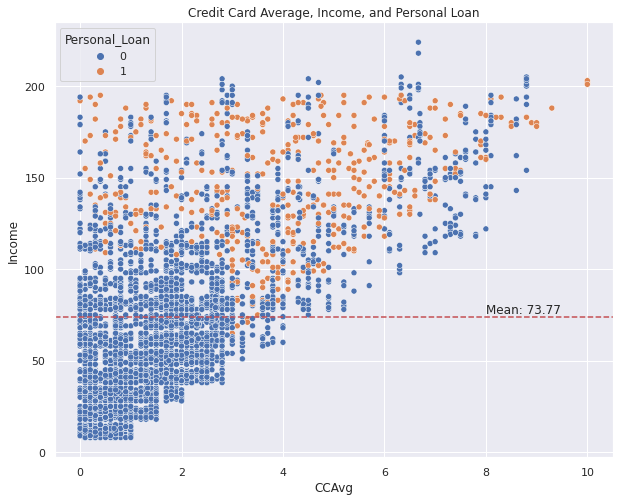

In [ ]:
plt.figure(figsize = (10,8))
plt.title('Credit Card Average, Income, and Personal Loan')
sns.scatterplot(x = df.CCAvg, y = df.Income, hue = df.Personal_Loan)
plt.axhline(df.Income.mean(), color = 'r', linestyle = 'dashed')
plt.text(8, df.Income.mean() + 2, 'Mean: {:.2f}'.format(df.Income.mean()));

### Age vs Personal Loan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


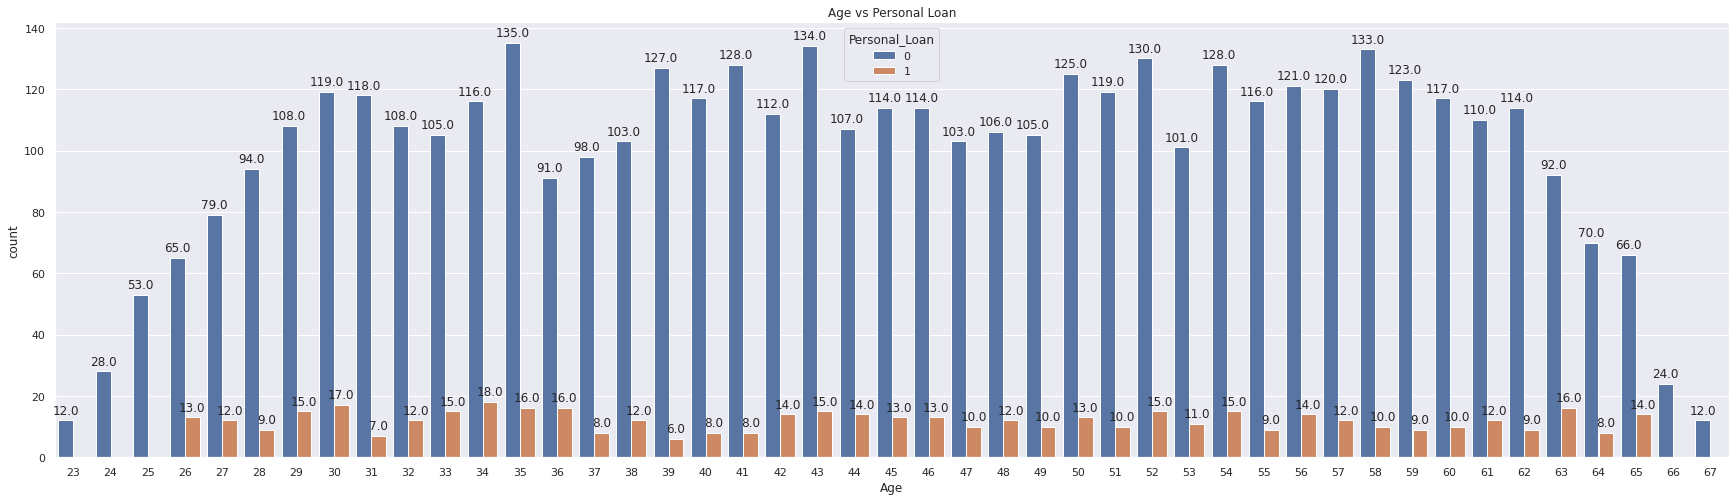

In [ ]:
plt.figure(figsize = (30,8))
plt.title('Age vs Personal Loan')
fmplot = sns.countplot(df.Age, hue = df.Personal_Loan);

for i in fmplot.patches:
    fmplot.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### CD Account vs Personal Loan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


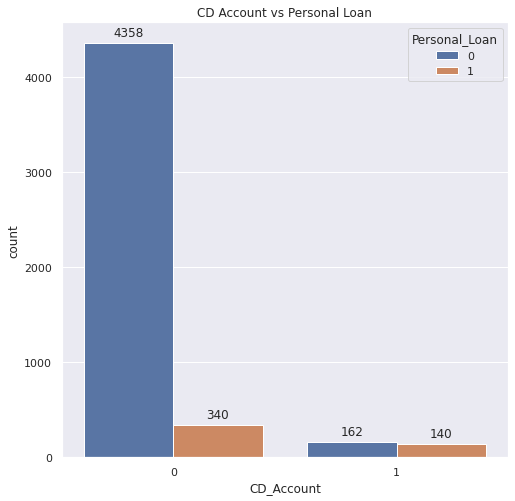

In [ ]:
plt.figure(figsize = (8,8))
plt.title('CD Account vs Personal Loan')
ccplot = sns.countplot(df.CD_Account, hue = df.Personal_Loan);


for i in ccplot.patches:
     ccplot.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Mortage vs Income vs Personal Loan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


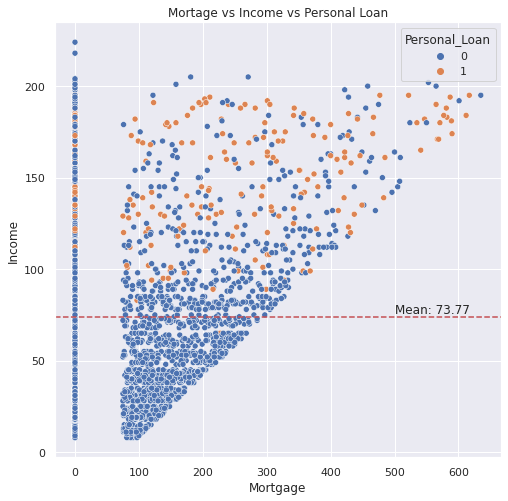

In [ ]:
plt.figure(figsize = (8,8))
plt.title('Mortage vs Income vs Personal Loan')
MIP_plot = sns.scatterplot(df.Mortgage, df.Income, hue = df.Personal_Loan);
plt.axhline(df.Income.mean(), color = 'r', linestyle = 'dashed')
plt.text(500, df.Income.mean() + 2, 'Mean: {:.2f}'.format(df.Income.mean()));

### Grouped income vs CC Average

In [ ]:
bins = [5, 10, 39, 68, 100, 150, 200, 250]
labels = ['5 - 10', '10 - 39', '39 - 68', '68 - 100', '100 - 150', '150 - 200', '200 - 250']
df['Income_binned'] = pd.cut(df.Income, bins, labels = labels)
print(df)

      Age  Experience  Income  ...  CreditCard  Personal_Loan  Income_binned
ID                             ...                                          
1      25           1      49  ...           0              0        39 - 68
2      45          19      34  ...           0              0        10 - 39
3      39          15      11  ...           0              0        10 - 39
4      35           9     100  ...           0              0       68 - 100
5      35           8      45  ...           1              0        39 - 68
...   ...         ...     ...  ...         ...            ...            ...
4996   29           3      40  ...           0              0        39 - 68
4997   30           4      15  ...           0              0        10 - 39
4998   63          39      24  ...           0              0        10 - 39
4999   65          40      49  ...           0              0        39 - 68
5000   28           4      83  ...           1              0       68 - 100

In [ ]:
del df['income_binned']

In [ ]:
df.head(10)

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan,Income_binned
ID,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0,39 - 68
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0,10 - 39
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,10 - 39
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,68 - 100
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0,39 - 68
6,37,13,29,92121,4,0.4,2,155,0,0,1,0,0,10 - 39
7,53,27,72,91711,2,1.5,2,0,0,0,1,0,0,68 - 100
8,50,24,22,93943,1,0.3,3,0,0,0,0,1,0,10 - 39
9,35,10,81,90089,3,0.6,2,104,0,0,1,0,0,68 - 100


In [ ]:
df.Income_binned.value_counts()

39 - 68      1333
10 - 39      1240
68 - 100     1143
100 - 150     770
150 - 200     426
5 - 10         72
200 - 250      16
Name: Income_binned, dtype: int64

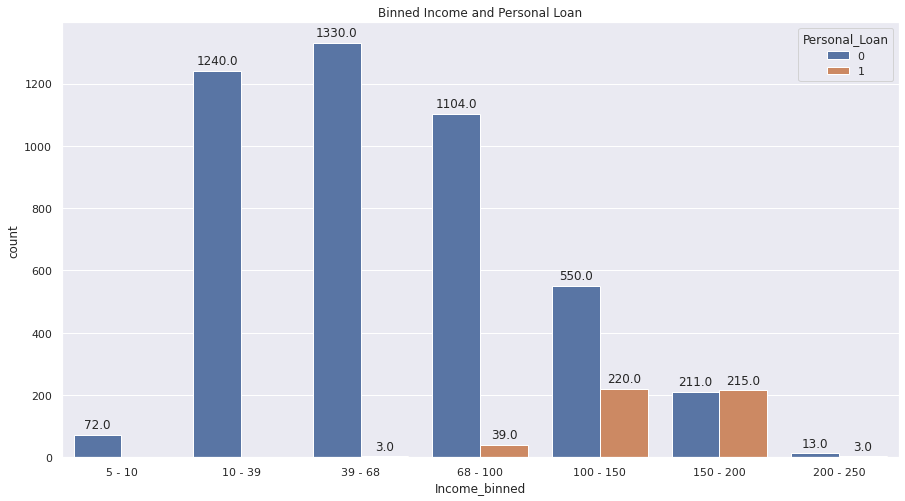

In [ ]:
plt.figure(figsize = (15,8))
plt.title('Binned Income and Personal Loan')
in_plot = sns.countplot(x = df.Income_binned, hue = df.Personal_Loan);

for i in in_plot.patches:
    in_plot.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Prediction

In [ ]:
X_train.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,
409,60,36,89,91745,2,2.8,1,0,0,0,1,0
3738,44,19,30,91423,1,0.5,3,0,0,0,1,0
3890,26,0,19,93014,1,0.1,2,121,0,0,1,0
569,34,9,41,92101,2,0.1,1,161,0,0,1,1
1042,56,32,51,92780,4,1.5,1,0,0,0,0,0


In [ ]:
df.CD_Account.value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [ ]:
df_test = pd.DataFrame(
    {'Age':[40, 25, 27, 36, 38, 42, 30, 50, 50, 35],
     'Experience':[15, 5, 6, 10, 13, 19, 7, 25, 25, 13],
     'Income':[40, 10, 30, 30, 60, 45, 59, 85, 100, 60],
     'ZIP_Code':[91320, 92101, 94112, 93340, 90034, 93023, 92612, 93023, 93023, 91107],
     'Family':[4, 4, 3, 3, 3, 2, 3, 4, 4, 4],
     'CCAvg':[3.5, 5.0, 4.0, 1.0, 3.5, 2.5, 2.8, 3.0, 3.0, 7.0],
     'Education':[3, 2, 2, 1, 2, 2, 3, 3, 3, 3],
     'Mortgage':[16, 5, 60, 0, 0, 3, 2, 5, 5, 46],
     'Securities_Account':[1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
     'CD_Account':[1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
     'Online':[1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
     'CreditCard':[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]}
                   )

df_test

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,40,15,40,91320,4,3.5,3,16,1,1,1,1
1,25,5,10,92101,4,5.0,2,5,0,1,1,1
2,27,6,30,94112,3,4.0,2,60,1,1,1,1
3,36,10,30,93340,3,1.0,1,0,0,0,0,1
4,38,13,60,90034,3,3.5,2,0,0,1,1,1
5,42,19,45,93023,2,2.5,2,3,0,0,1,0
6,30,7,59,92612,3,2.8,3,2,1,1,0,1
7,50,25,85,93023,4,3.0,3,5,1,1,1,1
8,50,25,100,93023,4,3.0,3,5,1,0,1,1
9,35,13,60,91107,4,7.0,3,46,1,1,1,1


In [ ]:
X_pred = pd.DataFrame(df_test)

X_pred.head(10)

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,40,15,40,91320,4,3.5,3,16,1,1,1,1
1,25,5,10,92101,4,5.0,2,5,0,1,1,1
2,27,6,30,94112,3,4.0,2,60,1,1,1,1
3,36,10,30,93340,3,1.0,1,0,0,0,0,1
4,38,13,60,90034,3,3.5,2,0,0,1,1,1
5,42,19,45,93023,2,2.5,2,3,0,0,1,0
6,30,7,59,92612,3,2.8,3,2,1,1,0,1
7,50,25,85,93023,4,3.0,3,5,1,1,1,1
8,50,25,100,93023,4,3.0,3,5,1,0,1,1
9,35,13,60,91107,4,7.0,3,46,1,1,1,1


In [ ]:
df_test['Personal_Loan'] = rf1.predict(X_pred)

df_test.head(10)

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan
0,40,15,40,91320,4,3.5,3,16,1,1,1,1,1
1,25,5,10,92101,4,5.0,2,5,0,1,1,1,1
2,27,6,30,94112,3,4.0,2,60,1,1,1,1,1
3,36,10,30,93340,3,1.0,1,0,0,0,0,1,0
4,38,13,60,90034,3,3.5,2,0,0,1,1,1,1
5,42,19,45,93023,2,2.5,2,3,0,0,1,0,0
6,30,7,59,92612,3,2.8,3,2,1,1,0,1,0
7,50,25,85,93023,4,3.0,3,5,1,1,1,1,1
8,50,25,100,93023,4,3.0,3,5,1,0,1,1,1
9,35,13,60,91107,4,7.0,3,46,1,1,1,1,0


In [ ]:
proba_array = rf3.predict_proba(X_pred)

proba_array

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


array([[0.43032499, 0.56967501],
       [0.41925324, 0.58074676],
       [0.28723888, 0.71276112],
       [1.        , 0.        ],
       [0.40523493, 0.59476507],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.42400587, 0.57599413],
       [0.33425454, 0.66574546],
       [0.59911821, 0.40088179]])

In [ ]:
df_proba = pd.DataFrame(proba_array, columns = ['Not purchasing the loan', 'Purchasing the loan'])
df_proba

,Not purchasing the loan,Purchasing the loan
0,0.430325,0.569675
1,0.419253,0.580747
2,0.287239,0.712761
3,1.000000,0.000000
4,0.405235,0.594765
5,1.000000,0.000000
6,1.000000,0.000000
7,0.424006,0.575994
8,0.334255,0.665745
9,0.599118,0.400882
